# Bepaling van soortelijke warmte van water


# Introductie

Water heeft een enorme buffercapaciteit: je moet veel energie toevoegen om de temperatuur van water een graad te verwarmen. In dit practicum gaan we de soortelijke warmte van water bepalen door een bekende hoeveelheid water te verwarmen met een bekende hoeveelheid energie, en de temperatuurstijging te meten.

# Theorie

Geef hier de natuurkundige achtergrond van het onderwerp. 

De warmtecapaciteit voor een stof wordt gegeven door 
$$
c = \frac{Q}{m\Delta T}
$$
hierbij is Q de aangevoerde of afgevoerde warmte van het systeem in J, m de massa in kg en het temperatuurverschil \Delta T in K. In dit experiment wordt de warmte geleverd door een elektrisch verwarmingselement met een vermogen P dus 
$$ c = \frac{Pt}{m\Delta T} $$

Het vermogen wordt gegeven door $P = UI = \frac{U^2}{R}$ dus

$ c = \frac{U^2 t}{mR\Delta T} $

# Methode en materialen

## Ontwerp
Een waterbad met bekende massa aan water wordt verwarmd met een elektrisch verwarmingselement dat een bekende hoeveelheid energie levert.
De temperatuur van het water wordt gemeten met een temperatuursensor.
Door de temperatuurstijging als functie van de tijd te meten kan de soortelijke warmte van water worden berekend.


## Materialen
Hieronder staat de lijst van benodigde materialen bij deze proef:
- Maatbeker
- Weegschaal
- Water
- Elektrisch verwarmingselement ($10 \mathrm{\Omega}$, $10 \mathrm{W}$)
- Voedingsbron 
- Thermometer of temperatuursensor
- Stopwatch of timer

```{figure} figures/cwater_setup.jpg
:width: 70%

Een schematische weergave van de opstelling
```

## Procedure
```{exercise}
1. Beschrijf de procedure die nodig is om de soortelijke warmte van water te bepalen.
2. Geef jouw beschrijving van de procedure aan een ander team, zij verzamelen voor jou de data op basis van de gegevens.
3. Voer het experiment van een ander team uit op basis van hun beschrijving.
4. Analyseer de data die het andere groepje voor jou heeft verzameld.
```

Meetplan (doorgestuurd door ander groepje):

- stap  1: check of je alles hebt
- stap 2: stel de weegschaal in  wanneer de maatbeker op de weegschaal zit
- stap 3: zet 250 g water in de maatbeker en zet het daarna op de weegschaal om te wegen hoe 'zwaar' het water is.
- stap 4: meet voor het verwarmen het temperatuur van het water, T_0 en laat het temperatuursensor in het water.
- stap 5: pak het verwarmingselement/weerstand
- stap 6: zet een van de rode draden in de plus en de ander in de min van de voedingsbron 
- stap 7: zet het weerstand in het water en start de 'magneetroeder'. wacht totdat het ding erin goed begint met roeren
- stap 8: pak je stopwatch en reset het
- stap 9: zet je stopwatch aan op het moment dat je de voedingsbron aan zet. het water zal langzaam beginnen met verwarmen (let op:  er mag niet meer dan 40W over de weerstand zitten). noteer ook het vermogen
- stap 10: voer elke 30 seconden een meting uit en herhaal dit tot dat je 5 minuten aan metingen hebt. (of tot dat hij een bepaald temperatuur heeft bereikt).

optioneel: doe het nog een keer, maar met 500g water als daar tijd voor is. 

## Veiligheid
We maken gebruik van een $10 \mathrm{\Omega}$, $10 \mathrm{W}$ weerstand.
Deze wordt snel heet.
De bronspanning mag dan ook alleen aan wanneer de weerstand in het water zit.
Raak de weerstand niet aan tijdens het experiment.
Omdat de weerstand in het water zit, kunnen we wel het elektrisch vermogen hoger zetten zonder dat de weerstand oververhit raakt.
Het maximaal vermogen mag $40 \mathrm{W}$ zijn.
Daarbij moet de roerder wel aanstaan om de warmte goed te verdelen.

## Data analyse
Na het uitvoeren van de metingen zullen we een fit uitvoeren op basis van het bovenbeschreven verband. We verwachten een lineair verband te vinden door de meetpunten, waaruit de soortelijke warmte van water bepaald kan worden. Vervolgens berekenen we uit de fit ook de onzekerheid, waardoor een conclusie getrokken kan worden of de constante strijdig is met de literatuurwaarde of niet.

# Resultaten


In [1]:
# Hier de data en de analyse

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

mwater = 0.5167     #kg

U = 19.1    #ingestelde spanning
R = 10      #ohm

#Tijdstap was 60 seconden

T = np.array([23.0,24.0,24.8,25.7,26.6,27.4,28.3,29.1,29.9,30.6,31.4,32.2,33.1,33.8,34.6,35.4])
t = np.arange(len(T))*30



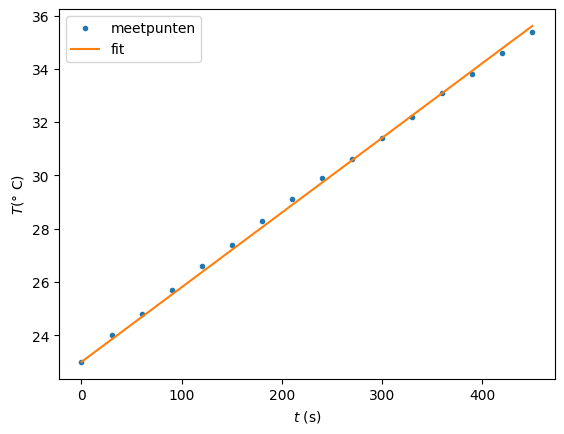

in de literatuur is de soortelijke warmte van water 4.18 *10^3 J/kg K
de gevonden waarde voor de soortelijke warmte van water is 2519.6 +/- 13.9 J/kg K, deze waarde is duidelijk strijdig met de literatuurwaarde


In [ ]:
#Data-analyse met fit op basis van formule uit de theorie

def fit(t, c):
    return (U**2 * t)/(mwater * R * c) + T[0]

vals, covs = curve_fit(fit, t, T, p0=(4.18*1e3))

xfit = np.linspace(np.min(t), np.max(t), 1000)
yfit = fit(xfit, *vals)

plt.figure()
plt.plot(t, T, '.',label = 'meetpunten')
plt.plot(xfit, yfit, '-', label = 'fit')
plt.xlabel('$t$ (s)')
plt.ylabel(r'$T (\degree$ C)')
plt.legend()
plt.show()
#plt.savefig("figures/cwater.png", dpi=450)

c = vals[0]

uc = np.sqrt(covs[0,0])

print("In de literatuur is de soortelijke warmte van water 4.18 *10^3 J/kg K")
print(f"De gevonden waarde voor de soortelijke warmte van water is {c:.5g} +/- {uc:.3g} J/kg K, deze waarde is duidelijk strijdig met de literatuurwaarde")




# Discussie en conclusie



Discussie:
De gevonden waarde voor c is strijdig met de literatuurwaarde, hiervoor zijn een paar verschillende verklaringen mogelijk:
- Er is ook warmteverlies naar de omgeving waar geen rekening mee is gehouden
- Het kan zijn dat de thermometer vertraagd was, waardoor temperaturen niet volledig accuraat zijn afgelezen
- er bevond zich alleen een kleine roerder aan de onderkant van het waterband, het kan zijn dat het water daardoor niet goed is geroerd waardoor de temperatuur niet helemaal homogeen verdeeld was

verder kan er in een vervolg verbeterd worden door het experiment vaker uit te voeren om zo random errors te voorkomen.

Conclusie:
De gevonden waarde voor c is strijdig met de literatuurwaarde, maar dat is grotendeels te verklaren door warmteverliezen aan de omgeving en onnauwkeurigheden in de metingen.